In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
data = datasets.load_digits()

In [9]:
X = data.data
y = data.target

In [5]:
def one_hot(target, n_classes):
    n_samples = y.shape[0]
    one_hot = np.zeros((n_samples, n_classes))
    one_hot[np.arange(n_samples), target] = 1
    return one_hot

In [10]:
y = one_hot(y, 10)

In [11]:
X.shape, y.shape

((1797, 64), (1797, 10))

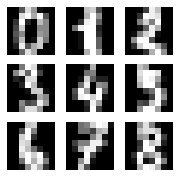

In [12]:
n = 3
_, axarr = plt.subplots(n,n,figsize=(n,n))
for i in range(n):
    for j in range(n):
        k = i*n + j
        axarr[i,j].imshow(data.images[k], cmap='gray')
        axarr[i,j].axis('off')
        #axarr[i,j].set_title('label: {}'.format(data.target[k]))

In [15]:
import neural_net as nn

In [16]:
from importlib import reload

In [60]:
reload(nn)

<module 'neural_net' from '/Users/nikku/projects/deeplearn/neural_net.py'>

In [61]:
neural_net = nn.NeuralNetwork(X,y, [15])

In [62]:
neural_net.layers

[15, 10]

In [63]:
neural_net.init_network()

In [64]:
neural_net

In [65]:
neural_net.forward()

In [45]:
neural_net.params['W_0'].shape

(15, 64)

In [50]:
neural_net.X.shape

(1797, 64)

In [ ]:
neural_net.X[0]

In [52]:
np.dot(neural_net.params['W_0'], neural_net.X[0])

array([  4.81085982,  -0.78134512,  -2.70344827,   5.77759859,
         8.20493803,   7.07998365,   2.30455243,  -0.88731964,
        10.72360216,  -1.5297761 ,  -0.23649669,   5.68607021,
        -2.07884588, -10.50535784,  -0.12527393])

In [49]:
sizes = [2,3,1]
[(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

[(3, 2), (1, 3)]

In [47]:
neural_net.params['W_0'] @ neural_net.X.T

array([[  4.81085982,   9.33140881,   2.18561804, ...,   7.69300202,
         14.27545383,   8.7024325 ],
       [ -0.78134512,   2.44952672,   5.01095796, ...,  -1.06918894,
          1.12391864,   0.50687359],
       [ -2.70344827,   1.96236555,  -9.27145427, ...,   1.72658859,
         -4.14395907,  -3.07730824],
       ...,
       [ -2.07884588,  -5.67088272, -10.48354999, ..., -10.6284908 ,
         -1.66386981,  -6.02783925],
       [-10.50535784,  -0.48251628, -12.05836139, ...,  -8.73483825,
         -7.70608802,  -7.55301859],
       [ -0.12527393,  -0.36239375,  -2.53733709, ...,  -0.28065414,
         -1.62839044,  -3.6062171 ]])

In [44]:
neural_net.X.shape

(1797, 64)

In [29]:
neural_net.yhat.shape

(1797, 10)

In [95]:
yhat = neural_net.yhat

In [30]:
yhat.T.shape

NameError: name 'yhat' is not defined

In [94]:
neural_net.cache.keys()

dict_keys(['A_0', 'Z_0', 'A_1', 'Z_1'])

In [97]:
neural_net.X.shape

(1797, 64)

In [98]:
neural_net.y.shape

(1797, 10)

In [107]:
params['W_0'].shape

(15, 1797)